In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x=np.arange(-1,6,0.1)

In [3]:
y=-(x-1)*(x-3)*(x-4)

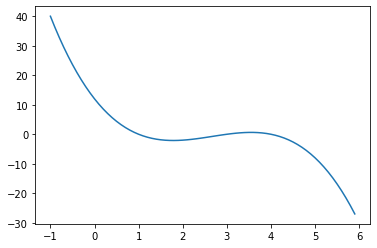

In [4]:
plt.plot(x,y)

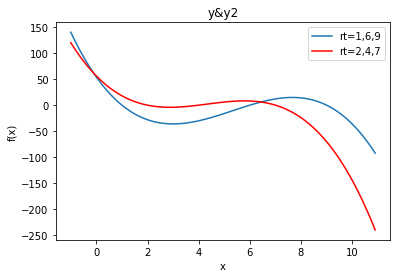

In [5]:
x=np.arange(-1,11,0.1)
y=-(x-1)*(x-6)*(x-9)
y2=-(x-2)*(x-4)*(x-7)

plt.plot(x,y,label='rt=1,6,9')
plt.plot(x,y2,"r",label='rt=2,4,7')
plt.title('y&y2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# 이미지 표시

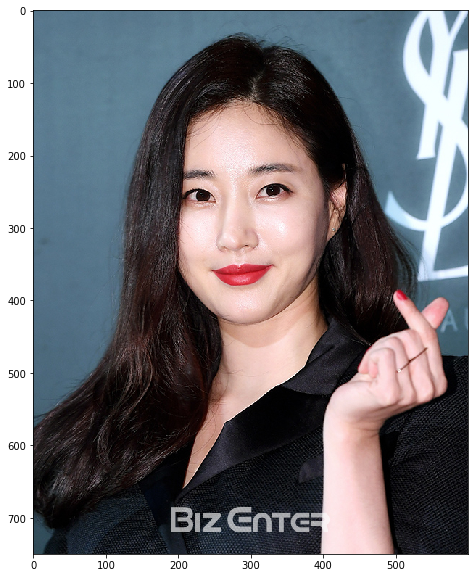

In [6]:
from matplotlib.image import imread
img = imread('../../images/kim_love.jpg') # 이미지 읽어오기
plt.figure(figsize=(8,10))
plt.imshow(img)
plt.show()

# CH.2 퍼셉트론

# AND 게이트 구현

In [7]:
def AND(x1,x2):
    w1,w2, theta = 0.5, 0.5, 0.7 # 초기값인 가중치1, 가중치2, 임계값 설정
    tmp = x1*w1 + x2*w2 # 식을 만들어줌
    if tmp <= theta: # theta보다 작다면 return 0 
        return 0
    elif tmp > theta: # theta보다 크다면 return 1
        return 1    

In [8]:
AND(0,0)

0

In [9]:
AND(1,0)

0

In [10]:
AND(0,1)

0

In [11]:
AND(1,1)

1

In [12]:
def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    tmp=np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

# NAND 게이트 구현

In [13]:
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
NAND(0,0)

1

In [15]:
NAND(1,0)

1

In [16]:
NAND(0,1)

1

In [17]:
NAND(1,1)

0

# OR 게이트 구현

In [18]:
def OR(x1, x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5]) # AND와는 가중치(w와 b)만 다르다.
    b=-0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [19]:
OR(0,0)

0

In [20]:
OR(1,0)

1

In [21]:
OR(0,1)

1

In [22]:
OR(1,1)

1

In [23]:
x=np.array([0,1])
w=np.array([0.5,0.5])
b= -0.7 # 편향 = -0.7
w*x
np.sum(w*x)

0.5

In [24]:
np.sum(w*x) + b

-0.19999999999999996

# XOR 게이트 구현하기

In [25]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [26]:
XOR(0,0)

0

In [27]:
XOR(1,0)

1

In [28]:
XOR(0,1)

1

In [29]:
XOR(1,1)

0

# ch.3 신경망

In [30]:
import math

In [31]:
1/(1+math.exp(-1.0))

0.7310585786300049

In [32]:
1/(1+math.exp(-2.0))

0.8807970779778823

In [33]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [34]:
step_function(3.0)

1

In [35]:
step_function(-3.0)

0

In [36]:
def step_function(x):
    y = x >0
    return y.astype(np.int)

In [37]:
import numpy as np
x = np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [38]:
y=x>0
y

array([False,  True,  True])

In [39]:
y=y.astype(np.int)
y

array([0, 1, 1])

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [41]:
def step_function(x):
    return np.array(x>0,dtype=np.int)

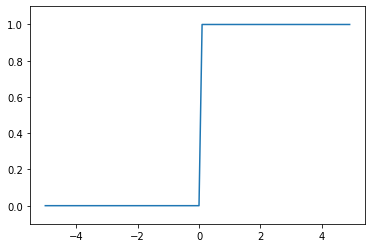

In [42]:
x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축의 범위 지정
plt.show()

In [43]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

In [44]:
x=np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [45]:
t=np.array([1.0,2.0,3.0])
1.0+t

array([2., 3., 4.])

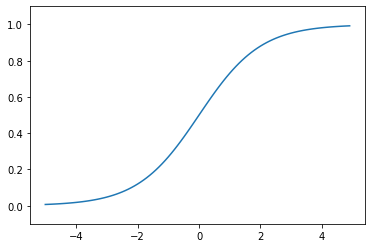

In [46]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

# 시그모이드 함수와 계단 함수 비교

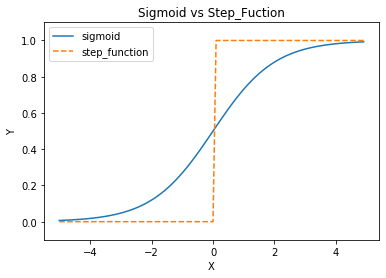

In [47]:
x=np.arange(-5.0,5.0,0.1)
y1=sigmoid(x)
y2=step_function(x)

plt.plot(x,
         y1,
         label='sigmoid')
plt.plot(x,
         y2,
         linestyle='--',
         label='step_function')
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-0.1,1.1)
plt.title('Sigmoid vs Step_Fuction')
plt.legend()
plt.show()

In [48]:
def relu(x):
    return np.maximum(0,x)

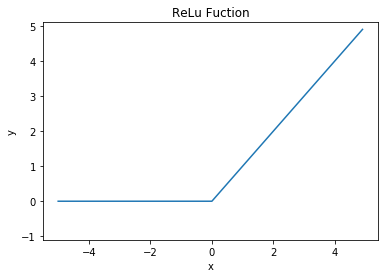

In [49]:
x=np.arange(-5.0,5.0,0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-1.1,5.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLu Fuction')
plt.show()

# 다차원 배열의 계산

In [50]:
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [51]:
A=np.array([[1,2],[3,4]])
print(A.shape)
B=np.array([[5,6],[7,8]])
print(B.shape)
np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [52]:
A=np.array([[1,2,3],[4,5,6]])
print(A.shape)
B=np.array([[1,2],[3,4],[5,6]])
print(B.shape)
np.dot(A,B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [53]:
X=np.array([1,2])
print(X.shape)
W=np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X,W)
Y=np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


# 3층 신경망 구현하기

In [54]:
# 1층 3개짜리 구현하기(p.85)
X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])
print(W1.shape)
print(B1.shape)
print(X.shape)
A1=np.dot(X,W1) + B1
print(A1)

(2, 3)
(3,)
(2,)
[0.3 0.7 1.1]


In [55]:
# p.86
Z1=sigmoid(A1) # Activation 함수
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [56]:
# 1층에서 2층으로 가는 광정을 구현
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)

(3,)
(3, 2)
(2,)


In [57]:
def identity_function(x):
    return X

In [58]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) +B3
Y=identity_function(A3)
Y

array([1. , 0.5])

In [59]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

In [60]:
def forward(network,x):
    W1,W2,W3 = network['W1'], network['W2'],network['W3']
    b1,b2,b3 = network['b1'], network['b2'],network['b3']
    
    a1 = np.dot(x, W1) +b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1,W2) +b2
    z2 = sigmnoid(a2)
    
    a3 = np.dot(z2,W3) +b3
    y = identity_fuction(a3)
    
    return y

# Keras

In [61]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [62]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.datasets import mnist